In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-10-29 20:15:38,127: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
import numpy as np

In [6]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    if case == "balanced":
        # Apply cnot for each qubit
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
    
    if case == "constant":
        # Decide the fixed output of the oracle
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [7]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1,n)
    # Setup input register
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    return dj_circuit
    

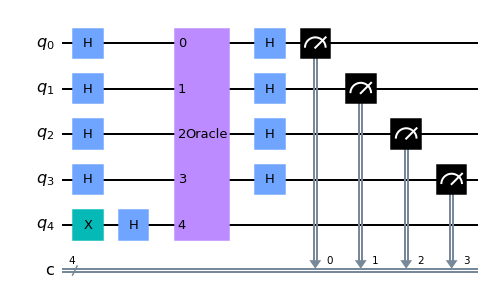

In [8]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw()

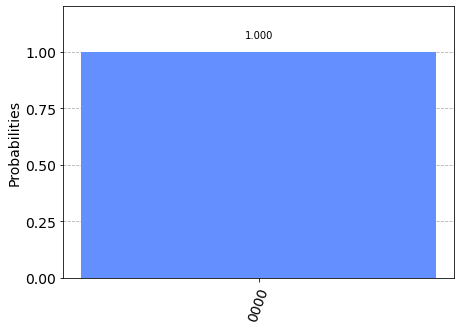

In [9]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n,'constant')
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [13]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.get_provider(group='open')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)
%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

least busy backend:  ibmq_athens


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

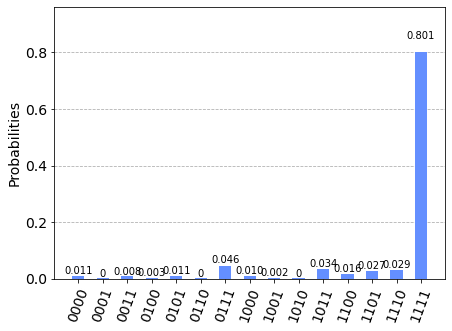

In [15]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)